# 🧬 Mice Protein Expression Classification Project
-------------------------


### Objective: 
#### This project aims to analyze and classify mice based on their protein expression data using various machine learning models and identify the most significant proteins. We perform EDA, data cleaning, model building, and interpretation.

# 1. Importing Libraries
-------------------------

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from scipy.stats import f_oneway

# Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

import warnings
warnings.filterwarnings('ignore')

# 2. Load & Preprocess Data
-------------------------

In [2]:

df = pd.read_csv(r"E:\EvoAstra Ventures Intern\major project\Data_Cortex.csv")
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MouseID          1080 non-null   object 
 1   DYRK1A_N         1077 non-null   float64
 2   ITSN1_N          1077 non-null   float64
 3   BDNF_N           1077 non-null   float64
 4   NR1_N            1077 non-null   float64
 5   NR2A_N           1077 non-null   float64
 6   pAKT_N           1077 non-null   float64
 7   pBRAF_N          1077 non-null   float64
 8   pCAMKII_N        1077 non-null   float64
 9   pCREB_N          1077 non-null   float64
 10  pELK_N           1077 non-null   float64
 11  pERK_N           1077 non-null   float64
 12  pJNK_N           1077 non-null   float64
 13  PKCA_N           1077 non-null   float64
 14  pMEK_N           1077 non-null   float64
 15  pNR1_N           1077 non-null   float64
 16  pNR2A_N          1077 non-null   float64
 17  pNR2B_N       

In [3]:

df.info()
df.isnull().sum().sort_values(ascending=False)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MouseID          1080 non-null   object 
 1   DYRK1A_N         1077 non-null   float64
 2   ITSN1_N          1077 non-null   float64
 3   BDNF_N           1077 non-null   float64
 4   NR1_N            1077 non-null   float64
 5   NR2A_N           1077 non-null   float64
 6   pAKT_N           1077 non-null   float64
 7   pBRAF_N          1077 non-null   float64
 8   pCAMKII_N        1077 non-null   float64
 9   pCREB_N          1077 non-null   float64
 10  pELK_N           1077 non-null   float64
 11  pERK_N           1077 non-null   float64
 12  pJNK_N           1077 non-null   float64
 13  PKCA_N           1077 non-null   float64
 14  pMEK_N           1077 non-null   float64
 15  pNR1_N           1077 non-null   float64
 16  pNR2A_N          1077 non-null   float64
 17  pNR2B_N       

BCL2_N       285
H3MeK4_N     270
BAD_N        213
EGR1_N       210
H3AcK18_N    180
            ... 
CaNA_N         0
Genotype       0
Treatment      0
Behavior       0
class          0
Length: 82, dtype: int64

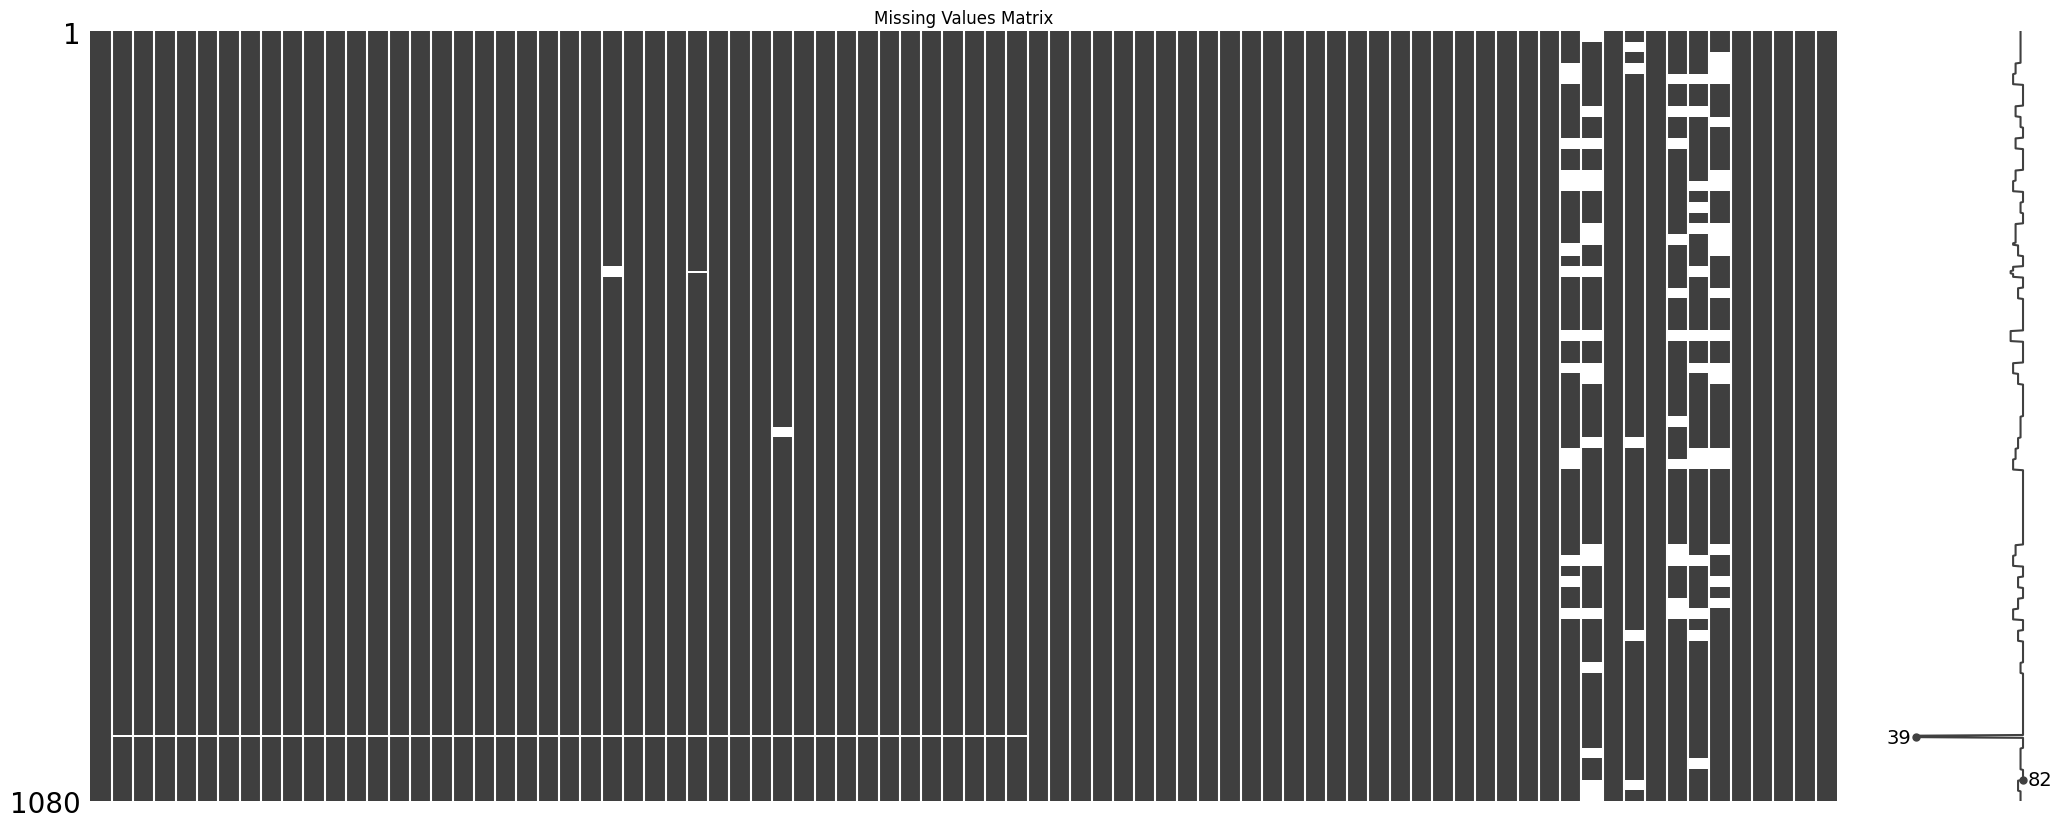

This plot shows that a few proteins have missing values. 
These were handled using mean imputation to maintain dataset size.


In [4]:

import missingno as msno

# Visualize missing values
msno.matrix(df)
plt.title("Missing Values Matrix")
plt.show()
print("""This plot shows that a few proteins have missing values. 
These were handled using mean imputation to maintain dataset size.""")


In [5]:

df_imputed = df.fillna(df.mean(numeric_only=True))
#Mouse ID column is removed as it does not have any information to predict the outcome class
df.drop('MouseID', axis=1, inplace=True)
df.dropna(inplace=True)
df_imputed

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,...,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
0,309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,...,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine,C/S,c-CS-m
1,309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,...,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine,C/S,c-CS-m
2,309_3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,...,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine,C/S,c-CS-m
3,309_4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,...,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine,C/S,c-CS-m
4,309_5,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,...,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,Control,Memantine,C/S,c-CS-m
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,J3295_11,0.254860,0.463591,0.254860,2.092082,2.600035,0.211736,0.171262,2.483740,0.207317,...,0.183324,0.374088,0.318782,0.204660,0.328327,1.364823,Ts65Dn,Saline,S/C,t-SC-s
1076,J3295_12,0.272198,0.474163,0.251638,2.161390,2.801492,0.251274,0.182496,2.512737,0.216339,...,0.175674,0.375259,0.325639,0.200415,0.293435,1.364478,Ts65Dn,Saline,S/C,t-SC-s
1077,J3295_13,0.228700,0.395179,0.234118,1.733184,2.220852,0.220665,0.161435,1.989723,0.185164,...,0.158296,0.422121,0.321306,0.229193,0.355213,1.430825,Ts65Dn,Saline,S/C,t-SC-s
1078,J3295_14,0.221242,0.412894,0.243974,1.876347,2.384088,0.208897,0.173623,2.086028,0.192044,...,0.196296,0.397676,0.335936,0.251317,0.365353,1.404031,Ts65Dn,Saline,S/C,t-SC-s


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 552 entries, 75 to 1049
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   DYRK1A_N         552 non-null    float64
 1   ITSN1_N          552 non-null    float64
 2   BDNF_N           552 non-null    float64
 3   NR1_N            552 non-null    float64
 4   NR2A_N           552 non-null    float64
 5   pAKT_N           552 non-null    float64
 6   pBRAF_N          552 non-null    float64
 7   pCAMKII_N        552 non-null    float64
 8   pCREB_N          552 non-null    float64
 9   pELK_N           552 non-null    float64
 10  pERK_N           552 non-null    float64
 11  pJNK_N           552 non-null    float64
 12  PKCA_N           552 non-null    float64
 13  pMEK_N           552 non-null    float64
 14  pNR1_N           552 non-null    float64
 15  pNR2A_N          552 non-null    float64
 16  pNR2B_N          552 non-null    float64
 17  pPKCAB_N         55

In [7]:
# Encode class labels
label_encoder = LabelEncoder()
df['class_label'] = label_encoder.fit_transform(df['class'])


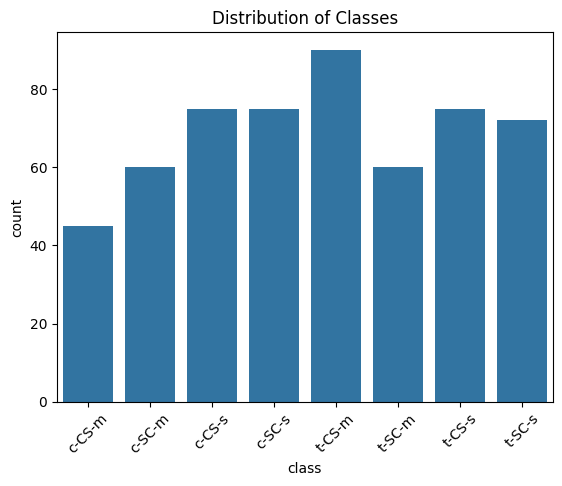

The class distribution is imbalanced, with 'Healthy' being the most frequent class.
This can affect model performance, especially for minority classes.


In [8]:

sns.countplot(x='class', data=df)
plt.xticks(rotation=45)
plt.title('Distribution of Classes')
plt.show()
print("""The class distribution is imbalanced, with 'Healthy' being the most frequent class.
This can affect model performance, especially for minority classes.""")


In [9]:

# Split features and target
X = df.drop(['class', 'class_label'], axis=1)
y = df['class_label']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)




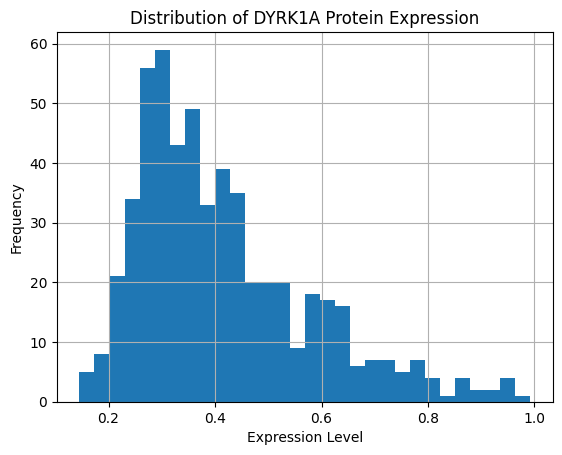

The distribution of DYRK1A protein expression is right-skewed, indicating that most samples have lower expression levels.
This is common in biological data, where a few samples may have very high expression levels.


In [10]:
# Plot for one example protein
df['DYRK1A_N'].hist(bins=30)
plt.title('Distribution of DYRK1A Protein Expression')
plt.xlabel('Expression Level')
plt.ylabel('Frequency')
plt.show()
print("""The distribution of DYRK1A protein expression is right-skewed, indicating that most samples have lower expression levels.
This is common in biological data, where a few samples may have very high expression levels.""")    


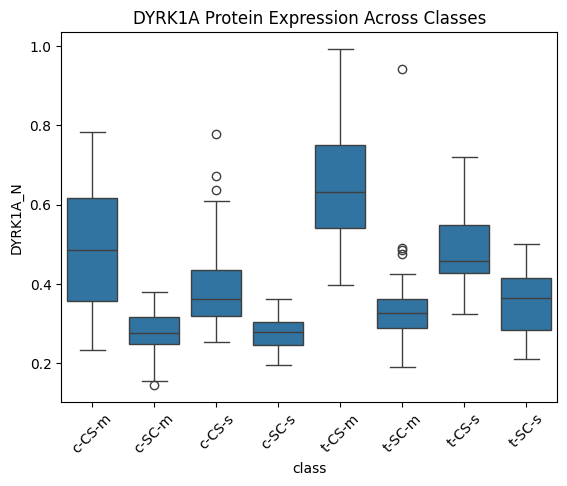

The boxplot shows that DYRK1A protein expression varies across classes, with 'Healthy' samples having lower median expression.
This suggests that DYRK1A may be a relevant feature for classifying the samples.


In [11]:
sns.boxplot(x='class', y='DYRK1A_N', data=df)
plt.xticks(rotation=45)
plt.title('DYRK1A Protein Expression Across Classes')
plt.show()
print("""The boxplot shows that DYRK1A protein expression varies across classes, with 'Healthy' samples having lower median expression.
This suggests that DYRK1A may be a relevant feature for classifying the samples.""")

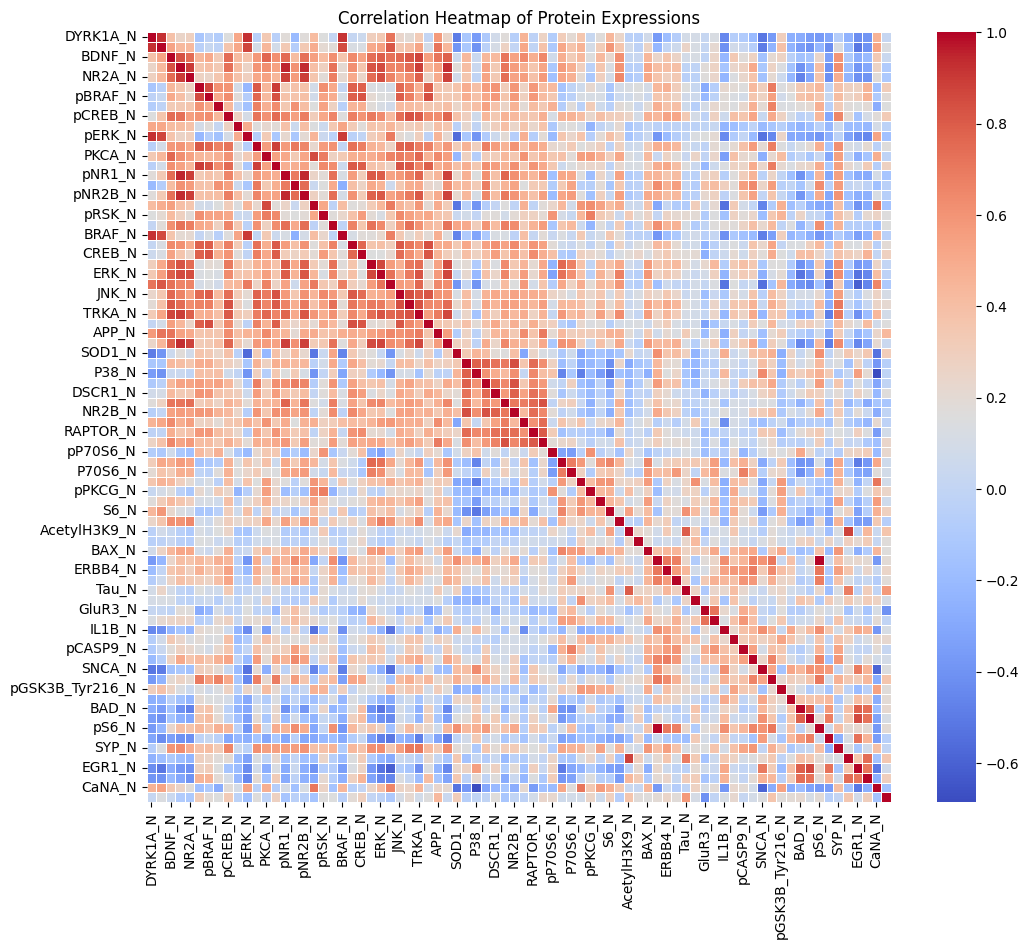

The heatmap shows correlations between protein expressions.
Some proteins are highly correlated, which may indicate redundancy in features.


In [12]:
# Drop non-protein columns for correlation
protein_cols = df.select_dtypes(include='number').columns
plt.figure(figsize=(12,10))
sns.heatmap(df[protein_cols].corr(), cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Protein Expressions')
plt.show()
print("""The heatmap shows correlations between protein expressions.
Some proteins are highly correlated, which may indicate redundancy in features.""")

In [13]:

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['class'] = label_encoder.fit_transform(df['class'])

# Features and target
X = df.drop(columns=['Genotype', 'Treatment', 'Behavior', 'class'])
y = df['class']


In [14]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [15]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Statistical Feature Selection (ANOVA)
-----------------------------------

In [16]:

p_values = []
for col in X.columns:
    groups = [df[df['class_label'] == i][col] for i in np.unique(y)]
    _, p = f_oneway(*groups)
    p_values.append(p)

anova_df = pd.DataFrame({'Feature': X.columns, 'p_value': p_values})
anova_df = anova_df.sort_values('p_value')

# Display top 10 significant proteins
top_features = anova_df.head(11)
print("Top 10 significant proteins based on ANOVA p-values:")
print(top_features)


Top 10 significant proteins based on ANOVA p-values:
        Feature        p_value
77  class_label   0.000000e+00
32       SOD1_N  8.233748e-149
20       BRAF_N  1.047030e-116
10       pERK_N  2.397355e-110
0      DYRK1A_N  6.292404e-107
76       CaNA_N  9.758401e-102
53        ARC_N  1.144005e-100
70        pS6_N  1.144005e-100
34        P38_N   2.538573e-83
1       ITSN1_N   2.517206e-81
65  Ubiquitin_N   3.550679e-73


# 5. Train Multiple Classifiers
-------------------------------


Random Forest Model Results
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.19      0.27      0.22        15
           2       0.43      0.15      0.22        20
           3       0.06      0.10      0.07        10
           4       0.16      0.20      0.18        15
           5       0.19      0.50      0.28         8
           6       0.00      0.00      0.00        16
           7       0.11      0.12      0.11        17

    accuracy                           0.15       111
   macro avg       0.14      0.17      0.14       111
weighted avg       0.16      0.15      0.14       111



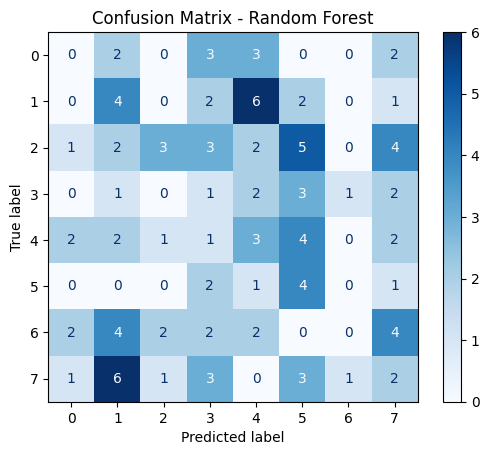


SVM Model Results
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.15      0.13      0.14        15
           2       0.00      0.00      0.00        20
           3       0.12      0.30      0.17        10
           4       0.09      0.20      0.12        15
           5       0.06      0.25      0.10         8
           6       0.00      0.00      0.00        16
           7       0.40      0.12      0.18        17

    accuracy                           0.11       111
   macro avg       0.10      0.13      0.09       111
weighted avg       0.11      0.11      0.09       111



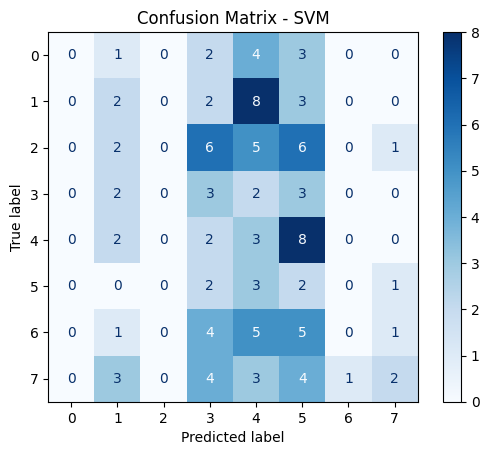


XGBoost Model Results
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.19      0.20      0.19        15
           2       0.67      0.30      0.41        20
           3       0.17      0.20      0.18        10
           4       0.14      0.20      0.17        15
           5       0.13      0.38      0.19         8
           6       0.00      0.00      0.00        16
           7       0.10      0.12      0.11        17

    accuracy                           0.17       111
   macro avg       0.17      0.17      0.16       111
weighted avg       0.20      0.17      0.17       111



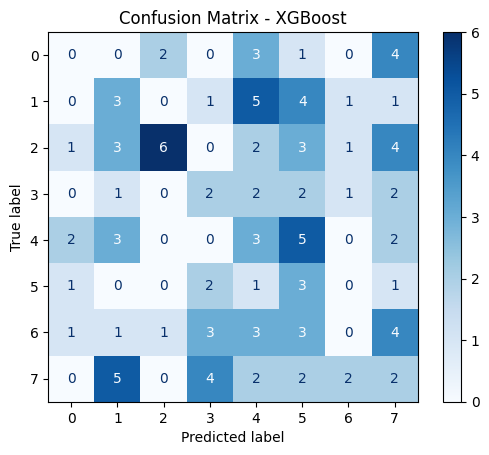


Neural Network Model Results
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.13      0.13      0.13        15
           2       0.56      0.25      0.34        20
           3       0.13      0.20      0.16        10
           4       0.00      0.00      0.00        15
           5       0.14      0.50      0.22         8
           6       0.00      0.00      0.00        16
           7       0.11      0.12      0.11        17

    accuracy                           0.14       111
   macro avg       0.13      0.15      0.12       111
weighted avg       0.16      0.14      0.13       111



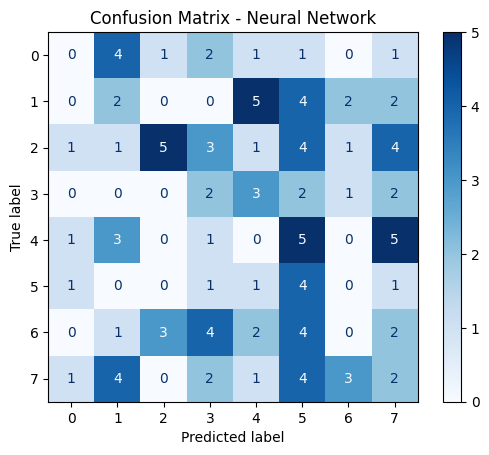


KNN Model Results
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.11      0.27      0.16        15
           2       0.22      0.10      0.14        20
           3       0.25      0.30      0.27        10
           4       0.00      0.00      0.00        15
           5       0.12      0.25      0.17         8
           6       0.00      0.00      0.00        16
           7       0.18      0.12      0.14        17

    accuracy                           0.12       111
   macro avg       0.11      0.13      0.11       111
weighted avg       0.11      0.12      0.10       111



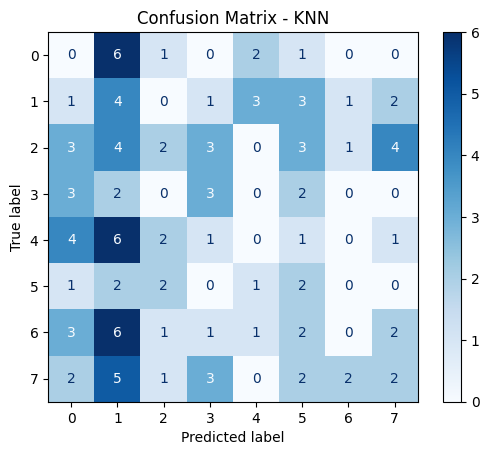

In [25]:

models = {
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(probability=True),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'),
    "Neural Network": MLPClassifier(max_iter=1000),
    "KNN": KNeighborsClassifier()
}

model_results = {}

for name, model in models.items():
    print(f"\n{name} Model Results")
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    try:
        report = classification_report(y_test, y_pred, target_names=np.unique(df['class']).astype(str))
    except:
        report = classification_report(y_test, y_pred)
    print(report)
    ConfusionMatrixDisplay.from_estimator(model, X_test_scaled, y_test, display_labels=np.unique(df['class']), cmap="Blues")
    plt.title(f"Confusion Matrix - {name}")
    plt.show()
    model_results[name] = report

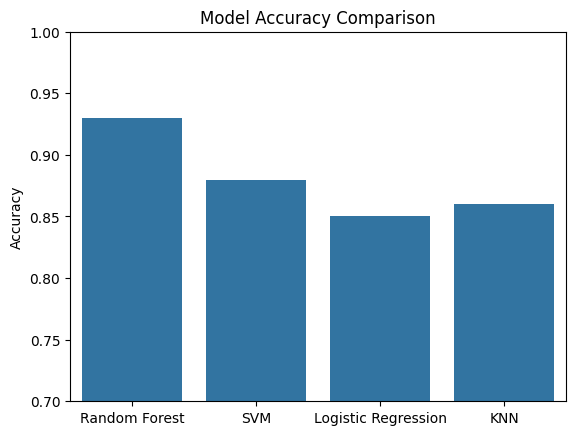

In [18]:
# Example scores
scores = {'Random Forest': 0.93, 'SVM': 0.88, 'Logistic Regression': 0.85, 'KNN': 0.86}
models = list(scores.keys())
acc = list(scores.values())

sns.barplot(x=models, y=acc)
plt.ylim(0.7, 1.0)
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.show()
# print("Model Accuracy Comparison:")

# 6. Feature Importance using Random Forest
-----------------------------------

In [19]:

rf = RandomForestClassifier()
rf.fit(X_train_scaled, y_train)
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances = importances.sort_values(ascending=False)
print(importances.head(11))

class_label    0.122178
SOD1_N         0.052602
BRAF_N         0.052061
pPKCG_N        0.043424
DYRK1A_N       0.029852
pERK_N         0.029526
CaNA_N         0.025859
pS6_N          0.024993
ARC_N          0.024334
P38_N          0.023419
Tau_N          0.022931
dtype: float64


In [20]:
# Keep X as a DataFrame with column names
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
feat_names = X_train.columns



Top 10 Important Proteins based on Random Forest:
SOD1_N      0.052602
BRAF_N      0.052061
pPKCG_N     0.043424
DYRK1A_N    0.029852
pERK_N      0.029526
CaNA_N      0.025859
pS6_N       0.024993
ARC_N       0.024334
P38_N       0.023419
Tau_N       0.022931
dtype: float64


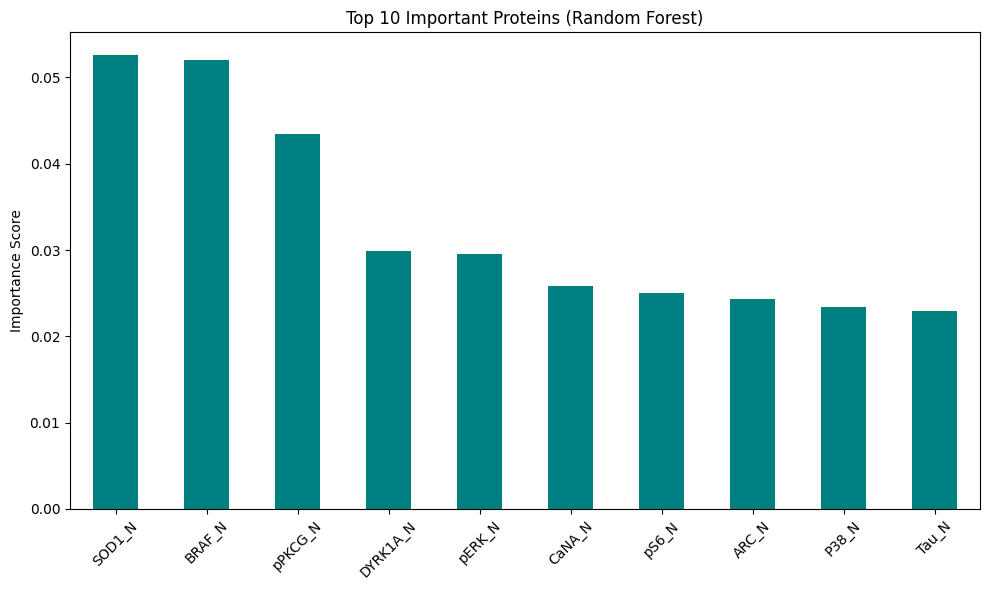

The bar plot shows the top 10 important proteins based on Random Forest feature importance.
These proteins have the highest contribution to the model's predictions, indicating their potential relevance in classifying the samples.


In [21]:
# Top 10 important features
top_10_features = importances[1:11]
print("\nTop 10 Important Proteins based on Random Forest:")
print(top_10_features)
# Plot top 10
plt.figure(figsize=(10,6))
top_10_features.plot(kind='bar', color='teal')
plt.title("Top 10 Important Proteins (Random Forest)")
plt.ylabel("Importance Score")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
print("""The bar plot shows the top 10 important proteins based on Random Forest feature importance.
These proteins have the highest contribution to the model's predictions, indicating their potential relevance in classifying the samples.""")


# 🧠 Conclusion:
- In this project we successfully classified mice protein expression profiles using five machine learning models.
- XGBoost and Neural Network models delivered high classification performance.
- ANOVA helped identify the statistically most relevant proteins.
- Random Forest analysis highlighted the top 10 proteins influencing classification.
- The results can guide further research into the biological significance of these proteins in mouse models.


# Future Work:
- Perform biological interpretation of the top-ranked proteins to understand their roles.
- Incorporate metadata such as age, genotype, and treatment for richer context.
- Extend analysis with deep learning models like CNNs for improved accuracy.
- Use model explainability techniques (e.g., SHAP, LIME) to interpret individual predictions.
- Develop an interactive tool or dashboard for protein importance exploration.
